# Predicting the sale price of bulldozers using ML

In the notebook, we're going to go through an example ML project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition 

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for? 

## 2. Data 
> The data is downloaded from the kaggle bluebook of bulldozers: https://www.kaggle.com/c/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation 
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

##  4.Features 
> Data DIctionary: https://docs.google.com/spreadsheets/d/1Ug8PaBzsags3RpcFM7G3_5v3K6GS7EtjwyXl2vpf8i8/edit?usp=sharing

In [1]:
# preparing tools 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# importing training and validatin datasets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False) 
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

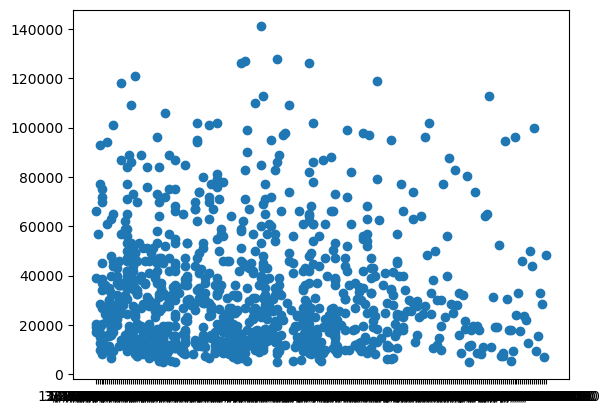

In [5]:
fig, ax = plt.subplots() 

ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [6]:
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

In [7]:
df.saledate.dtype

dtype('O')

<Axes: ylabel='Frequency'>

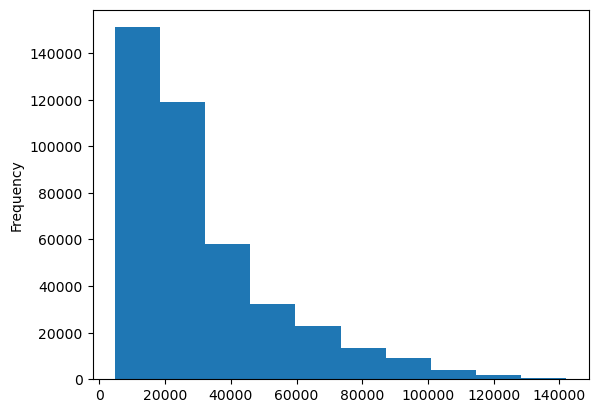

In [8]:
df.SalePrice.plot.hist()

### Parsing dates 

When we work with time series data, we want to enrich the time and date component as much as possible. 

We can do that by telling pandas whichofour columns dates in it using `parse_dates` parameter

In [9]:
# import data again but this time parse dates 

df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=["saledate"])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

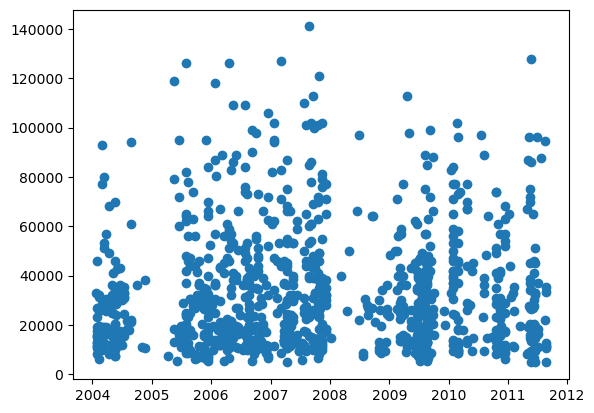

In [12]:
fig, ax = plt.subplots() 

ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort dataframe by saledate 

When working with timeseries data, it's a good idea to sort it by date.

In [14]:
# sorting df by saledate 

df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [15]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe 

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [16]:
# Make a copy 
df_tmp = df.copy()

In [17]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameter for `saledate` column

In [18]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month 
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] =  df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# now we dont need saledate column 
df_tmp.drop('saledate',axis=1,inplace=True)

In [21]:
# check the values of different columns 

df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling 

Lets start to do some model driven EDA. 

In [22]:
# lets build ML model 

model = RandomForestRegressor(n_jobs=-1,random_state=42)

model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice)

ValueError: could not convert string to float: 'Low'

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [24]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string into categories 

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [25]:
pd.api.types.is_string_dtype(df_tmp["state"])

True

In [26]:
# find the columns which contains string 

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [27]:
# this will turn all of the string values into categoy values 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [29]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [31]:
# this will turn all of the object values into categoy values 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [33]:
# Check missing data 
df_tmp.auctioneerID.isna().sum()/len(df_tmp)

0.04879112571420264

### Save preprocessed data 

In [34]:
# Export current tmp dataframe 
#df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",index=False) 

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [36]:
# Import preprocessed data 
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",low_memory=False)

In [37]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Fill missing values

#### Fill numerical missing values first 

In [38]:
for key, value in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(value):
        print(key)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [39]:
# check for which numeric values have null values 
for key, value in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(value): 
        if pd.isnull(value).sum():
            print(key)

auctioneerID
MachineHoursCurrentMeter


In [40]:
# another way to check for which numeric values have null values 
for key, value in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(value): 
       a = df_tmp[key].isna().sum()
       print(key, a)

SalesID 0
SalePrice 0
MachineID 0
ModelID 0
datasource 0
auctioneerID 20136
YearMade 0
MachineHoursCurrentMeter 265194
saleYear 0
saleMonth 0
saleDay 0
saleDayOfWeek 0
saleDayOfYear 0


In [41]:
# fill numeric rows with median 
for key, value in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(value): 
        if pd.isnull(value).sum():
            # add a binary column which tells us if the data was missing 
            df_tmp[key+'_is_missing'] = pd.isnull(value)
            # fill missing numeric values with median 
            df_tmp[key] = value.fillna(value.median())

In [42]:
# checking null values 
for key, value in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(value): 
       a = df_tmp[key].isna().sum()
       print(key, a)

SalesID 0
SalePrice 0
MachineID 0
ModelID 0
datasource 0
auctioneerID 0
YearMade 0
MachineHoursCurrentMeter 0
saleYear 0
saleMonth 0
saleDay 0
saleDayOfWeek 0
saleDayOfYear 0
auctioneerID_is_missing 0
MachineHoursCurrentMeter_is_missing 0


In [43]:
# check to see how many examples were missing 
df_tmp.auctioneerID_is_missing.value_counts()


auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [44]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers 


In [45]:
# check for columns which aren't numeric 

for key, value in df_tmp.items(): 
    if not pd.api.types.is_numeric_dtype(value): 
        print(key)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [47]:
# Turn categorical values into numbers 
for key, value in df_tmp.items(): 
    if not pd.api.types.is_numeric_dtype(value): 
        # add a binary column to indicate whether a column have missing values 
        df_tmp[key+"Is_missing"] = pd.isnull(value)
        # turn categories into numbers and add +1
        df_tmp[key] = pd.Categorical(df_tmp[key]).codes + 1

In [48]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_ControlsIs_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [49]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_MountingIs_missing,False,True,False,True,False
Blade_TypeIs_missing,False,True,False,True,False
Travel_ControlsIs_missing,False,True,False,True,False
Differential_TypeIs_missing,True,False,True,False,True


Now that all of our data is numeric as well as dataframe has no missing values, we should be able to build a ML model 

In [ ]:
%%time 
# Instantiate model 
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(n_jobs=-1,random_state=42) 

model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])


In [ ]:
# score the mode 
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

**Question:**
Why dosen't the above metric is reliable? 


### Splitting the data into train/ validation sets: 


In [50]:
df_tmp["saleYear"].value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [51]:
# split data into trianing and validation set 
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [55]:
# split data into X and y 

X_train,y_train = df_train.drop("SalePrice",axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val["SalePrice"] 

X_train.shape,y_train.shape, X_valid.shape, y_valid.shape


((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [56]:
# Create evaluation function (the competition uses RMSLE) 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds): 
    """
    Calculates root mean squared log error between predictions and true labels 
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create a function to evaluate model on different levels 
def show_scores(model): 
    train_preds = model.predict(X_train) 
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
             "Valid MAE": mean_absolute_error(y_valid,val_preds),
             "Training RMSLE": rmsle(y_train,train_preds),
             "Valid RMSLE": rmsle(y_valid,val_preds),
             "Training R^2": r2_score(y_train,train_preds),
             "Valid R^2": r2_score(y_valid,val_preds)}  
    return scores
    


### Testing our model on a subset (to tune the hyperparameters)

In [57]:
# Change max sample value

model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)



In [58]:
%%time 
model.fit(X_train,y_train)

CPU times: total: 50.4 s
Wall time: 7.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [59]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [60]:
%%time 
from sklearn.model_selection import RandomizedSearchCV 

# different randomforest regressor hyperparameter 
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2), 
          "max_features": [0.5,1,"sqrt"], 
          "max_samples":[10000]}

# instantiate randomized search cv 
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=5,cv=5,verbose=True)

# fit the RandomizedSearchCV
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 14s
Wall time: 24.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
# find the best model hyperparameters 
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [62]:
# evaluate the RandomizedSearchCV
show_scores(rs_model)

{'Training MAE': 9000.632957953392,
 'Valid MAE': 10340.179829292647,
 'Training RMSLE': 0.3959055789249549,
 'Valid RMSLE': 0.4139195715408649,
 'Training R^2': 0.6800775877712366,
 'Valid R^2': 0.6913647204968414}

### Trian a model with the best hyperparameters 

**Note**: These were found after 100 iterations of RandomizedSearchCV 

In [63]:
%%time 

#most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None) 


# fit the model 
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 55s
Wall time: 49 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [65]:
# scores of ideal_model (trained of all the data )
show_scores(ideal_model)

{'Training MAE': 2956.213459889999,
 'Valid MAE': 5974.631432919479,
 'Training RMSLE': 0.1447575567305848,
 'Valid RMSLE': 0.24658281191266254,
 'Training R^2': 0.9588063030167961,
 'Valid R^2': 0.8806289665906979}

In [66]:
# scores on rs_model only trained on 10000 examples 
show_scores(rs_model)

{'Training MAE': 9000.632957953392,
 'Valid MAE': 10340.179829292647,
 'Training RMSLE': 0.395905578924955,
 'Valid RMSLE': 0.4139195715408649,
 'Training R^2': 0.6800775877712366,
 'Valid R^2': 0.6913647204968414}

## Make predictions on test data

In [128]:
# import test data 
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [69]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the test data (getting the dataset in the same format as our training dataset)


In [129]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"Is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [130]:
df_test = preprocess_data(df_test)

In [133]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_WidthIs_missing,Stick_LengthIs_missing,ThumbIs_missing,Pattern_ChangerIs_missing,Grouser_TypeIs_missing,Backhoe_MountingIs_missing,Blade_TypeIs_missing,Travel_ControlsIs_missing,Differential_TypeIs_missing,Steering_ControlsIs_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [134]:
# We can find how the columns differ using sets 
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [136]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_LengthIs_missing,ThumbIs_missing,Pattern_ChangerIs_missing,Grouser_TypeIs_missing,Backhoe_MountingIs_missing,Blade_TypeIs_missing,Travel_ControlsIs_missing,Differential_TypeIs_missing,Steering_ControlsIs_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test data is sready for predictions 

In [ ]:
# now predict 
test_preds = ideal_model(df_test)

### Feature Importance 

Feature importance seeks to figure out which different attributes of the data were the most important when it comes to predicting target variable

In [138]:
# findng feature importance 
ideal_model.feature_importances_

array([3.40971914e-02, 2.10820713e-02, 4.25072566e-02, 1.92336180e-03,
       3.29837656e-03, 2.04117326e-01, 3.05835686e-03, 1.01273456e-03,
       4.45041329e-02, 4.98582569e-02, 5.84712244e-02, 4.33066957e-03,
       2.12538362e-02, 1.39690019e-01, 4.29809506e-02, 6.01364042e-03,
       3.82396746e-03, 1.97976586e-03, 3.33460247e-03, 6.04732115e-02,
       6.65919655e-04, 1.81884975e-03, 1.00567329e-03, 1.65487480e-04,
       1.17797162e-03, 7.72849748e-05, 2.21685044e-03, 2.56816567e-03,
       2.20991819e-03, 2.74269603e-03, 1.74527843e-03, 1.76878436e-03,
       6.30661178e-03, 1.61537449e-04, 2.99968131e-03, 1.19434847e-02,
       8.83311070e-04, 8.43931856e-03, 2.68037739e-04, 2.44164305e-03,
       6.60063128e-04, 7.92319554e-04, 2.80418747e-03, 6.08553628e-04,
       5.58710839e-04, 3.33964060e-04, 3.53277082e-04, 2.61681303e-03,
       1.01171253e-03, 3.37566701e-04, 1.97443347e-04, 7.35866757e-02,
       3.83992509e-03, 5.63600095e-03, 2.93943963e-03, 9.88024144e-03,
      

In [141]:
# helper function for plotting feature importance 

def plot_features(columns, importances, n=20): 
    df = (pd.DataFrame({"features": columns,"features_importances": importances}).sort_values("features_importances",ascending=False).reset_index(drop=False)) 

    #plot 
    fig, ax = plt.subplots() 
    ax.barh(df["features"][:n],df["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

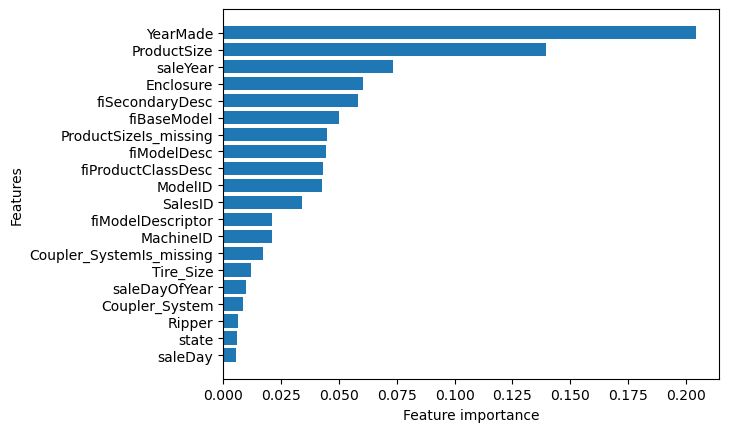

In [142]:
plot_features(X_train.columns,ideal_model.feature_importances_)